# Mobile Price Prediction

###### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)

In [2]:
df=pd.read_csv("Flipkart_output.csv")

In [3]:
df.drop(columns=["ImageUrl"],inplace=True)

In [4]:
df.shape

(1200, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Name             1200 non-null   object
 1   Storage_details  1200 non-null   object
 2   Screen_size      1200 non-null   object
 3   Camera_details   1200 non-null   object
 4   Battery_details  1200 non-null   object
 5   Processor        1199 non-null   object
 6   Price in Rupees  1200 non-null   object
dtypes: object(7)
memory usage: 65.8+ KB


In [6]:
df.isnull().sum()

Name               0
Storage_details    0
Screen_size        0
Camera_details     0
Battery_details    0
Processor          1
Price in Rupees    0
dtype: int64

In [7]:
df.describe()

,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees
count,1200,1200,1200,1200,1200,1199,1200
unique,951,103,143,160,197,378,417
top,Name,3 GB RAM | 32 GB ROM | Expandable Upto 64 GB,12.7 cm (5 inch) Display,13MP Rear Camera,4000 mAh Battery,MTK 6739 Processor,"4,999"
freq,48,76,119,154,169,73,99


In [8]:
 df.dropna(inplace=True)

In [9]:
for features in df.columns:
    print("Unique features in {} are {}".format(features,df[features].nunique()))

Unique features in Name are 950
Unique features in Storage_details are 103
Unique features in Screen_size are 143
Unique features in Camera_details are 160
Unique features in Battery_details are 197
Unique features in Processor are 378
Unique features in Price in Rupees are 417


In [10]:
df.head()

,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees
0,"Redmi 8 (Onyx Black, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999"
1,"Redmi Note 7S (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Qualcomm Snapdragon 660 AIE Processor,"9,999"
2,"Redmi 8A (Ocean Blue, 32 GB)",3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"6,999"
3,"Redmi Note 7 Pro (Neptune Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Qualcomm Snapdragon 675 Processor,"10,999"
4,"Redmi 8 (Sapphire Blue, 64 GB)",4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999"


###### Since few rows of data does not contain data and was filled with column name only , so removed that data

In [11]:
df=df[df["Storage_details"]!="Storage_details"]

In [12]:
# Obtaining name of the model

df["Name"]=df["Name"].str.split("(").str[0]
df["Name"]=df["Name"].str.strip()

In [13]:
# Obtaining brand name of the model

df["Brand_Name"]=df["Name"].str.split(" ").str[0]

df["Brand_Name"].value_counts().sort_values(ascending=False).head(50)

Kult         110
Samsung      105
Redmi         63
Vivo          58
Karbonn       56
Realme        48
OPPO          46
Mi            45
Micromax      43
Apple         37
Gionee        31
Honor         30
Panasonic     30
Nokia         26
Tecno         21
Lenovo        21
Moto          21
Lava          20
LG            16
LYF           15
Mobiistar     14
Itel          14
Asus          14
InFocus       14
Ziox          14
Intex         13
I             13
Coolpad       11
XOLO          10
Yu            10
Tashan        10
ZOPO           9
Yuho           9
OnePlus        9
Comio          9
iVooMi         8
Alcatel        7
Infinix        7
Celkon         6
VOTO           6
Huawei         5
Google         5
Ssky           4
Forme          4
JIVI           4
POCO           4
nuvo           4
Homtom         4
Seeken         3
Voto           3
Name: Brand_Name, dtype: int64

In [14]:
Brand_Name_list=df["Brand_Name"].value_counts().sort_values(ascending=False).index

In [15]:
Brand_Name_list

Index(['Kult', 'Samsung', 'Redmi', 'Vivo', 'Karbonn', 'Realme', 'OPPO', 'Mi',
       'Micromax', 'Apple', 'Gionee', 'Honor', 'Panasonic', 'Nokia', 'Tecno',
       'Lenovo', 'Moto', 'Lava', 'LG', 'LYF', 'Mobiistar', 'Itel', 'Asus',
       'InFocus', 'Ziox', 'Intex', 'I', 'Coolpad', 'XOLO', 'Yu', 'Tashan',
       'ZOPO', 'Yuho', 'OnePlus', 'Comio', 'iVooMi', 'Alcatel', 'Infinix',
       'Celkon', 'VOTO', 'Huawei', 'Google', 'Ssky', 'Forme', 'JIVI', 'POCO',
       'nuvo', 'Homtom', 'Seeken', 'Voto', 'Zen', 'HTC', 'Centric', 'XCCESS',
       'Black', 'M-tech', 'Nuu', 'Do', 'Ismart', 'Tiitan', 'Jivi', 'tecno',
       'Meizu', 'Lephone', 'Motorola', 'Spice', 'SCOSMOS', 'Scosmos', 'Trio',
       'HP', 'Smartron', 'Sony', 'Nubia', 'Lemon', 'Swipe', 'Leagoo', 'Reach',
       'ITEL', 'Virat', 'Microsoft', 'HPL', 'SSKY', 'TP-Link', 'Kenxinda',
       'ZIOX', 'YUHO', 'Lychee', 'Uinitel', 'Okwu', 'vivo', 'Kekai', 'Rage'],
      dtype='object')

In [16]:
Brand_Name_list=['Samsung', 'Redmi', 'Vivo', 'Realme', 'OPPO', 'Mi',
       'Micromax', 'Apple','Honor', 'Nokia',
       'Moto', 'LG','Asus','OnePlus','Google', 'Huawei',
       'HTC','Motorola','Sony']

In [17]:
# Taking into consideration only popular and known brands are taken into account

df=df[df["Brand_Name"].isin(Brand_Name_list)]

In [18]:
# Extract ram from the storage details feature

def ram_extract(text):
    if "RAM" in text:
        text=str(text)
        text=text.split(" ")[0]
        return text
    
df["RAM"]=df["Storage_details"].apply(ram_extract)

In [19]:
# Extract rom from the storage details feature

def rom_extract(text):
    if "ROM" in text and "RAM" in text:
        text=str(text)
        text=text.split("|")[1].strip()
        text=text.split(" ")[0]
        return text
    elif "ROM" in text:
        text=str(text)
        text=text.split(" ")[0]
        return text
    
df["ROM"]=df["Storage_details"].apply(rom_extract)

In [20]:
# def expandable_extract(text):
#     if "Expandable" in text and "RAM" in text and "ROM" in text:
#         text=str(text)
#         text=text.split("|")[2].strip()
#         text=text.split(" ")[2]
#         return text
#     elif "Expandable" in text and "ROM" in text:
#         text=str(text)
#         text=text.split("|")[1].strip()
#         text=text.split(" ")[0]
#         return text
#     elif "Expandable" in text and "RAM" in text:
#         text=str(text)
#         text=text.split("|")[1].strip()
#         text=text.split(" ")[0]
#         return text
#     elif "Expandable" in text:
#         text=str(text)
#         text=text.split(" ")[0]
#         return text
    
    
# df["Expandable"]=df["Storage_details"].apply(expandable_extract)

In [21]:
# def display_size_extract(text):
#     if "Full HD+" in text:
#         return "Full HD+"
#     else:
#         return "HD+"
        
    
# df["Screen_type"]=df["Screen_size"].apply(display_size_extract)

In [22]:
# Extract screen size in inch from screen size column

def display_size_extract(text):
    text=str(text)
    text=text.split("(")[1].strip()
    text=text.split(" inch")[0].strip()
    return text
        
    
df["Screen_size_in_inch"]=df["Screen_size"].apply(display_size_extract)
    

In [23]:
# Extract front camera details from camera details column

def front_camera_extract(text):
    if "Front Camera" in text and "|" in text:
        text=str(text)
        text=text.split("|")[1].strip()
        text=text.split(" ")[0]
        #text=text.replace("MP","")
        return text

df["Front_camera_in_MP"]=df["Camera_details"].apply(front_camera_extract)

In [24]:
# Extract rear camera details from camera details column

def rear_camera_extract(text):
    if "Rear Camera" in text:
        text=str(text)
        text=text.split("Rear Camera")[0].strip()
        return text
    elif "|" in text:
        text=str(text)
        text=text.split("|")[0].strip()
        return text
    
df["Rear_camera_in_MP"]=df["Camera_details"].apply(rear_camera_extract)
        

In [25]:
# Extract battery mAh from battery details column

def battery_extract(text):
    if "mAh" in text:
        text=str(text)
        text=text.split(" ")[0]
        return text
    
df["battery_mAh"]=df["Battery_details"].apply(battery_extract)

In [26]:
# def processor_extract(text):
#     if len(text.split(" "))>=2:
#         text=str(text)
#         text1=text.split(" ")[0]
#         text2=text.split(" ")[1]
#         text=text1+" "+text2
#         return text
#     else:
#         text=str(text)
#         text=text.split(" ")[0]
#         return text  
    
# df["Processor_name"]=df["Processor"].apply(processor_extract)

In [27]:
df.head()

,Name,Storage_details,Screen_size,Camera_details,Battery_details,Processor,Price in Rupees,Brand_Name,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
0,Redmi 8,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999",Redmi,4,64,6.22,8MP,12MP + 2MP,5000
1,Redmi Note 7S,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Battery,Qualcomm Snapdragon 660 AIE Processor,"9,999",Redmi,4,64,6.3,13MP,48MP + 5MP,4000
2,Redmi 8A,3 GB RAM | 32 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP Rear Camera | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"6,999",Redmi,3,32,6.22,8MP,12MP,5000
3,Redmi Note 7 Pro,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,16.0 cm (6.3 inch) Full HD+ Display,48MP + 5MP | 13MP Front Camera,4000 mAh Li-polymer Battery,Qualcomm Snapdragon 675 Processor,"10,999",Redmi,4,64,6.3,13MP,48MP + 5MP,4000
4,Redmi 8,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,15.8 cm (6.22 inch) HD+ Display,12MP + 2MP | 8MP Front Camera,5000 mAh Battery,Qualcomm Snapdragon 439 Processor,"7,999",Redmi,4,64,6.22,8MP,12MP + 2MP,5000


In [28]:
# Drop the unnecessary columns

df.drop(columns=["Storage_details","Screen_size","Camera_details","Battery_details","Processor"],inplace=True)

In [29]:
df.head()

,Name,Price in Rupees,Brand_Name,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
0,Redmi 8,"7,999",Redmi,4,64,6.22,8MP,12MP + 2MP,5000
1,Redmi Note 7S,"9,999",Redmi,4,64,6.3,13MP,48MP + 5MP,4000
2,Redmi 8A,"6,999",Redmi,3,32,6.22,8MP,12MP,5000
3,Redmi Note 7 Pro,"10,999",Redmi,4,64,6.3,13MP,48MP + 5MP,4000
4,Redmi 8,"7,999",Redmi,4,64,6.22,8MP,12MP + 2MP,5000


In [30]:
df.isnull().sum()

Name                    0
Price in Rupees         0
Brand_Name              0
RAM                    37
ROM                     0
Screen_size_in_inch     0
Front_camera_in_MP     41
Rear_camera_in_MP       0
battery_mAh            48
dtype: int64

In [31]:
df[df["RAM"].isnull()].head(37)

,Name,Price in Rupees,Brand_Name,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
50,Apple iPhone 7,"27,999",Apple,None,32,4.7,7MP,12MP,None
53,Apple iPhone 7,"27,999",Apple,None,32,4.7,7MP,12MP,None
93,Apple iPhone 8,"36,999",Apple,None,64,4.7,7MP,12MP,None
120,Apple iPhone 11,"69,900",Apple,None,128,6.1,12MP,12MP + 12MP,None
126,Apple iPhone 11,"64,900",Apple,None,64,6.1,12MP,12MP + 12MP,None
127,Apple iPhone 11,"69,900",Apple,None,128,6.1,12MP,12MP + 12MP,None
129,Apple iPhone 11,"69,900",Apple,None,128,6.1,12MP,12MP + 12MP,None
147,Apple iPhone XR,"49,900",Apple,None,64,6.1,7MP,12MP,None
152,Apple iPhone 11,"64,900",Apple,None,64,6.1,12MP,12MP + 12MP,None
161,Apple iPhone 6s,"23,999",Apple,None,32,4.7,5MP,12MP,None


###### Since ram was missing in most of the apple brand , so entered the correct ram values

In [32]:
def fill_ram_na(text):
    
    if text=="Apple iPhone 7":
        return 2
    elif text=="Apple iPhone 8":
        return 2
    elif text=="Apple iPhone 11":
        return 4
    elif text=="Apple iPhone XR":
        return 3
    elif text=="Apple iPhone 6s":
        return 2
    elif text=="Apple iPhone 11 Pro":
        return 4
    elif text=="Apple iPhone 11 Pro Max":
        return 4
    elif text=="Apple iPhone XS":
        return 4
    elif text=="Apple iPhone 8 Plus":
        return 3
    elif text=="Apple iPhone X":
        return 3
    elif text=="Apple iPhone XS Max":
        return 4
    elif text=="Apple iPhone 6":
        return 1
    elif text=="Apple iPhone 6s Plus":
        return 2
    elif text=="Apple iPhone 7 Plus":
        return 3
    
df['RAM'].fillna(df["Name"].map(fill_ram_na),inplace=True)

In [33]:
#df[df["Expandable"].isnull()].head(37)

In [34]:
# def fill_Expandable_na(text):
#     if text=="Apple":
#         return 0
#     elif text=="OnePlus":
#         return 0
#     elif text=="Sony":
#         return 0
#     elif text=="Google":
#         return 0
#     else:
#         return 256

# df["Expandable"].fillna(0,inplace=True)

In [35]:
df[df["battery_mAh"].isnull()].head(48)

,Name,Price in Rupees,Brand_Name,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
42,Realme 5,"9,999",Realme,4,64,6.5,13MP,12MP + 8MP + 2MP + 2MP,None
43,Realme 5,"8,999",Realme,3,32,6.5,13MP,12MP + 8MP + 2MP + 2MP,None
45,Realme 5,"9,999",Realme,4,64,6.5,13MP,12MP + 8MP + 2MP + 2MP,None
46,Realme 5,"10,999",Realme,4,128,6.5,13MP,12MP + 8MP + 2MP + 2MP,None
47,Realme 5,"10,999",Realme,4,128,6.5,13MP,12MP + 8MP + 2MP,None
48,Realme 5,"8,999",Realme,3,32,6.5,13MP,12MP + 8MP + 2MP,None
50,Apple iPhone 7,"27,999",Apple,2,32,4.7,7MP,12MP,None
53,Apple iPhone 7,"27,999",Apple,2,32,4.7,7MP,12MP,None
93,Apple iPhone 8,"36,999",Apple,2,64,4.7,7MP,12MP,None
120,Apple iPhone 11,"69,900",Apple,4,128,6.1,12MP,12MP + 12MP,None


###### Many of the battery mAh was also missing so entered those values too

In [36]:
def fill_battery_na(text):
    
    if text=="Realme 5":
        return 5000
    elif text=="Apple iPhone 7":
        return 1960
    elif text=="Apple iPhone 8":
        return 1821
    elif text=="Apple iPhone 11":
        return 3110
    elif text=="Apple iPhone XR":
        return 2942
    elif text=="Apple iPhone 6s":
        return 1715
    elif text=="Apple iPhone 11 Pro":
        return 3190
    elif text=="Apple iPhone 11 Pro Max":
        return 3500
    elif text=="Apple iPhone XS":
        return 2658
    elif text=="Apple iPhone 8 Plus":
        return 2691
    elif text=="Apple iPhone X":
        return 2716
    elif text=="Honor 7X":
        return 3340
    elif text=="Apple iPhone XS Max":
        return 3174
    elif text=="Apple iPhone 6":
        return 1810
    elif text=="Apple iPhone 6s Plus":
        return 2750
    elif text=="Apple iPhone 7 Plus":
        return 2900
    elif text=="HTC U11":
        return 3000
    
df['battery_mAh'].fillna(df["Name"].map(fill_battery_na),inplace=True)

In [37]:
df = df.dropna(axis=0, subset=['Rear_camera_in_MP'])

In [38]:
front_camera_null=df[df["Front_camera_in_MP"].isnull()]
front_camera_null.shape

(41, 9)

In [39]:
df=df.dropna(axis=0,subset=["Front_camera_in_MP"])

In [40]:
df.head(10)

,Name,Price in Rupees,Brand_Name,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
0,Redmi 8,"7,999",Redmi,4,64,6.22,8MP,12MP + 2MP,5000
1,Redmi Note 7S,"9,999",Redmi,4,64,6.3,13MP,48MP + 5MP,4000
2,Redmi 8A,"6,999",Redmi,3,32,6.22,8MP,12MP,5000
3,Redmi Note 7 Pro,"10,999",Redmi,4,64,6.3,13MP,48MP + 5MP,4000
4,Redmi 8,"7,999",Redmi,4,64,6.22,8MP,12MP + 2MP,5000
5,Realme 3i,"9,999",Realme,4,64,6.22,13MP,13MP + 2MP,4230
6,Realme 3i,"9,999",Realme,4,64,6.22,13MP,13MP + 2MP,4230
7,Realme 3i,"7,999",Realme,3,32,6.22,13MP,13MP + 2MP,4230
8,Realme 3i,"9,999",Realme,4,64,6.22,13MP,13MP + 2MP,4230
9,Realme 3i,"7,999",Realme,3,32,6.22,13MP,13MP + 2MP,4230


In [41]:
for features in df.columns:
    print("Unique features in {} are {}".format(features,df[features].nunique()))

Unique features in Name are 255
Unique features in Price in Rupees are 221
Unique features in Brand_Name are 19
Unique features in RAM are 14
Unique features in ROM are 12
Unique features in Screen_size_in_inch are 45
Unique features in Front_camera_in_MP are 17
Unique features in Rear_camera_in_MP are 59
Unique features in battery_mAh are 74


In [42]:
# Brand name is copied to name feature and dropped the brand name feature

df["Name"]=df["Brand_Name"]

In [43]:
df.drop(columns=["Brand_Name"],inplace=True)

In [44]:
df["RAM"].unique()

array(['4', '3', '2', '6', '8', 2.0, '1', '12', 4.0, 3.0, '1.5', '512',
       1.0, '256'], dtype=object)

###### RAM values greater then 12 does not make sense and most of the brands does not manufacture ram more then that

In [45]:
df["RAM"]=df["RAM"].replace("1.5","1")
df["RAM"]=df["RAM"].astype('int')
df=df[df["RAM"]<13]

In [46]:
df["ROM"].unique()

array(['64', '32', '128', '16', '256', '512', '8', '4', '2.5', '1'],
      dtype=object)

###### ROM values less then 32 does not make sense and most of the user consider brands that have rom 32 or more then that

In [47]:
df["ROM"]=df["ROM"].replace("2.5","4")
df["ROM"]=df["ROM"].astype('int')
df=df[df["ROM"]>30]

In [48]:
#df["Expandable"].unique()

In [49]:
# df=df[df["Expandable"]!="1"]
# df=df[df["Expandable"]!="2"]
# df=df[df["Expandable"]!="400"]
# df=df[df["Expandable"]!="32"]

In [50]:
df["Screen_size_in_inch"].unique()

array(['6.22', '6.3', '5.45', '5.99', '6.5', '6.1', '6.4', '4.7', '6.38',
       '6.21', '6.35', '6.26', '6.53', '6.39', '6.44', '6.2', '5.84',
       '6.08', '6.59', '6.55', '6.41', '5.8', '6.7', '6.67', '5.7', '5.2',
       '5.5', '6.23', '5.6', '5', '6', '5.93', '6.19', '6.52', '5.71',
       '6.6', '6.8', '6.18'], dtype=object)

In [51]:
df["Front_camera_in_MP"].unique()

array(['8MP', '13MP', '5MP', '20MP', '16MP', '25MP', '7MP', '32MP',
       '24MP', '12MP', '10MP', '48MP', '1.2MP', '2MP'], dtype=object)

In [52]:
df["Front_camera_in_MP"].value_counts().sort_values(ascending=False)

8MP      105
16MP      79
20MP      71
5MP       49
13MP      38
32MP      28
7MP       22
25MP      20
12MP      11
24MP       8
10MP       7
1.2MP      1
48MP       1
2MP        1
Name: Front_camera_in_MP, dtype: int64

In [53]:
df.head()

,Name,Price in Rupees,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
0,Redmi,"7,999",4,64,6.22,8MP,12MP + 2MP,5000
1,Redmi,"9,999",4,64,6.3,13MP,48MP + 5MP,4000
2,Redmi,"6,999",3,32,6.22,8MP,12MP,5000
3,Redmi,"10,999",4,64,6.3,13MP,48MP + 5MP,4000
4,Redmi,"7,999",4,64,6.22,8MP,12MP + 2MP,5000


In [54]:
# Removed Front camera pixel that were rearly present in the data

df=df[df["Front_camera_in_MP"]!="24MP"]
df=df[df["Front_camera_in_MP"]!="12MP"]
df=df[df["Front_camera_in_MP"]!="10MP"]
df=df[df["Front_camera_in_MP"]!="2MP"]
df=df[df["Front_camera_in_MP"]!="1.2MP"]

In [55]:
df["Rear_camera_in_MP"].unique()

array(['12MP + 2MP', '48MP + 5MP', '12MP', '13MP + 2MP', '20MP + 12MP',
       '48MP + 8MP + 2MP + 2MP', '48MP + 8MP + 2MP + 2MP Quad Camera',
       '16MP + 5MP', '64MP + 8MP + 2MP + 2MP Quad Camera',
       '12MP + 8MP + 2MP + 2MP', '12MP + 8MP + 2MP', '48MP + 8MP + 2MP',
       '24MP + 2MP + 8MP', '48MP + 8MP', '64MP + 13MP + 8MP + 2MP',
       '13MP + 2MP + 8MP', '12MP + 5MP', '48MP + 5MP + 8MP', '16MP + 2MP',
       '48MP + 13MP + 8MP + 2MP', '16MP + 8MP + 2MP', '48MP + 13MP + 8MP',
       '48 MP + 12 MP + 16 MP', '48 MP + 5 MP',
       '48 Million Quad Pixel Sensor (12 Million Effective Pixel) + 8MP + 5MP, AI Triple',
       '20MP + 2MP', '64MP + 5MP + 8MP', '13MP', '48 MP + 8 MP + 16 MP',
       '13MP + 5MP', '12MP + 12MP', '16MP + 20MP', '25MP + 5MP + 8MP',
       '8MP + 8MP', '16MP', '16MP + 16MP', '12.3MP', '48MP + 5MP + 16MP',
       '12MP + 13MP', '12.2MP', '32MP + 5MP + 8MP', '48MP + 2MP + 16MP',
       '48MP + 13MP', '16MP + 12MP', '13MP + 8MP + 5MP',
       '48MP + 8MP +

In [56]:
#rear_camera_list=df["Rear_camera_in_MP"].value_counts().sort_values(ascending=False).head(28).index

In [57]:
#df=df[df["Rear_camera_in_MP"].isin(rear_camera_list)]

In [58]:
#df["Rear_camera_in_MP"].value_counts().sort_values(ascending=False).head(28)

In [59]:
df["Rear_camera_in_MP"]=df["Rear_camera_in_MP"].replace("64MP + 8MP + 2MP + 2MP Quad Camera","64MP + 8MP + 2MP + 2MP")
df["Rear_camera_in_MP"]=df["Rear_camera_in_MP"].replace("48 Million Quad Pixel Sensor (12 Million Effective Pixel) + 8MP + 5MP, AI Triple","48MP + 8MP + 5MP")
df=df[df["Rear_camera_in_MP"]!="5 x 12MP"]

###### Since rear camera contains more then one camera but since the main camera is the primary camera and other camera are telephoto,depth and ultrawide which are not much useful as many brands like Apple does all the work using one lens only or two

In [60]:
df["Rear_camera_in_MP"]=df["Rear_camera_in_MP"].str.split(" ").str[0].replace("MP","")

In [61]:
df["Rear_camera_in_MP"].value_counts().sort_values(ascending=False)

13MP      119
12MP      101
48MP       57
16MP       53
20MP       44
64MP       11
48          8
25MP        7
12.3MP      4
32MP        2
24MP        2
12.2MP      1
8MP         1
20.7MP      1
5MP         1
Name: Rear_camera_in_MP, dtype: int64

In [62]:
rear_camera_list=df["Rear_camera_in_MP"].value_counts().sort_values(ascending=False).head(11).index

In [63]:
df=df[df["Rear_camera_in_MP"].isin(rear_camera_list)]

In [64]:
df["battery_mAh"]=df["battery_mAh"].astype('int')
df["battery_mAh"].max()

5000

In [65]:
df["battery_mAh"].describe()

count     408.000000
mean     3658.105392
std       667.180209
min      1715.000000
25%      3010.000000
50%      3730.000000
75%      4000.000000
max      5000.000000
Name: battery_mAh, dtype: float64

In [66]:
# def battery_bins(num):
#     if num<3011:
#         return 1
#     elif num>3010 and num<3751:
#         return 2
#     elif num>3750 and num<4006:
#         return 3
#     else:
#         return 4
    
df["battery_mAh"]=df["battery_mAh"].astype('int')

In [67]:
#df["battery_mAh"]=df["battery_mAh"].astype(str)

In [68]:
# df["battery_mAh"]=df["battery_mAh"].replace("1","Below 3010 mAh")
# df["battery_mAh"]=df["battery_mAh"].replace("2","3011-3750 mAh")
# df["battery_mAh"]=df["battery_mAh"].replace("3","3751-4005 mAh")
# df["battery_mAh"]=df["battery_mAh"].replace("4","Above 4005 mAh")

In [69]:
#df["Processor_name"].unique()

In [70]:
#df.drop(columns=["Processor_name"],inplace=True)

In [71]:
df.head()

,Name,Price in Rupees,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
0,Redmi,"7,999",4,64,6.22,8MP,12MP,5000
1,Redmi,"9,999",4,64,6.3,13MP,48MP,4000
2,Redmi,"6,999",3,32,6.22,8MP,12MP,5000
3,Redmi,"10,999",4,64,6.3,13MP,48MP,4000
4,Redmi,"7,999",4,64,6.22,8MP,12MP,5000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Name                 408 non-null    object
 1   Price in Rupees      408 non-null    object
 2   RAM                  408 non-null    int64 
 3   ROM                  408 non-null    int64 
 4   Screen_size_in_inch  408 non-null    object
 5   Front_camera_in_MP   408 non-null    object
 6   Rear_camera_in_MP    408 non-null    object
 7   battery_mAh          408 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 28.7+ KB


In [73]:
df["RAM"]=df["RAM"].astype("str")
df["ROM"]=df["ROM"].astype("str")
df["Screen_size_in_inch"]=df["Screen_size_in_inch"].astype("float")

In [74]:
#df["Expandable"]=df["Expandable"].astype("str")

######  Adding GB after RAM and ROM feature

In [75]:
df["RAM"]=df["RAM"] + " GB"
df["ROM"]=df["ROM"] + " GB"
#df["Expandable"]=df["Expandable"] + " GB"

In [76]:
#df["Price in Rupees"]=df["Price in Rupees"].str.split(",").str[0]

import re

def clean_price(text):
    text=str(text)
    text=re.sub(r',','',text)
    return text

df["Price in Rupees"]=df["Price in Rupees"].apply(clean_price)
df["Price in Rupees"]=df["Price in Rupees"].astype('int')

In [77]:
df.columns

Index(['Name', 'Price in Rupees', 'RAM', 'ROM', 'Screen_size_in_inch',
       'Front_camera_in_MP', 'Rear_camera_in_MP', 'battery_mAh'],
      dtype='object')

In [78]:
df[df["Name"]=="Redmi"]

,Name,Price in Rupees,RAM,ROM,Screen_size_in_inch,Front_camera_in_MP,Rear_camera_in_MP,battery_mAh
0,Redmi,7999,4 GB,64 GB,6.22,8MP,12MP,5000
1,Redmi,9999,4 GB,64 GB,6.30,13MP,48MP,4000
2,Redmi,6999,3 GB,32 GB,6.22,8MP,12MP,5000
3,Redmi,10999,4 GB,64 GB,6.30,13MP,48MP,4000
4,Redmi,7999,4 GB,64 GB,6.22,8MP,12MP,5000
10,Redmi,7999,4 GB,64 GB,6.22,8MP,12MP,5000
11,Redmi,5499,2 GB,32 GB,5.45,5MP,12MP,4000
12,Redmi,6999,3 GB,32 GB,6.22,8MP,12MP,5000
21,Redmi,6499,2 GB,32 GB,6.22,8MP,12MP,5000
22,Redmi,10999,4 GB,64 GB,6.30,13MP,48MP,4000


In [79]:
df=pd.get_dummies(columns=['Name', 'RAM', 'ROM',
        'Front_camera_in_MP', 'Rear_camera_in_MP'],data=df)

In [80]:
df.head()

,Price in Rupees,Screen_size_in_inch,battery_mAh,Name_Apple,Name_Asus,Name_Google,Name_HTC,Name_Honor,Name_Huawei,Name_LG,Name_Mi,Name_Micromax,Name_Moto,Name_Motorola,Name_Nokia,Name_OPPO,Name_OnePlus,Name_Realme,Name_Redmi,Name_Samsung,Name_Vivo,RAM_12 GB,RAM_2 GB,RAM_3 GB,RAM_4 GB,RAM_6 GB,RAM_8 GB,ROM_128 GB,ROM_256 GB,ROM_32 GB,ROM_512 GB,ROM_64 GB,Front_camera_in_MP_13MP,Front_camera_in_MP_16MP,Front_camera_in_MP_20MP,Front_camera_in_MP_25MP,Front_camera_in_MP_32MP,Front_camera_in_MP_48MP,Front_camera_in_MP_5MP,Front_camera_in_MP_7MP,Front_camera_in_MP_8MP,Rear_camera_in_MP_12.3MP,Rear_camera_in_MP_12MP,Rear_camera_in_MP_13MP,Rear_camera_in_MP_16MP,Rear_camera_in_MP_20MP,Rear_camera_in_MP_24MP,Rear_camera_in_MP_25MP,Rear_camera_in_MP_32MP,Rear_camera_in_MP_48,Rear_camera_in_MP_48MP,Rear_camera_in_MP_64MP
0,7999,6.22,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
1,9999,6.30,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,6999,6.22,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0
3,10999,6.30,4000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,7999,6.22,5000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0


In [81]:
df.columns

Index(['Price in Rupees', 'Screen_size_in_inch', 'battery_mAh', 'Name_Apple',
       'Name_Asus', 'Name_Google', 'Name_HTC', 'Name_Honor', 'Name_Huawei',
       'Name_LG', 'Name_Mi', 'Name_Micromax', 'Name_Moto', 'Name_Motorola',
       'Name_Nokia', 'Name_OPPO', 'Name_OnePlus', 'Name_Realme', 'Name_Redmi',
       'Name_Samsung', 'Name_Vivo', 'RAM_12 GB', 'RAM_2 GB', 'RAM_3 GB',
       'RAM_4 GB', 'RAM_6 GB', 'RAM_8 GB', 'ROM_128 GB', 'ROM_256 GB',
       'ROM_32 GB', 'ROM_512 GB', 'ROM_64 GB', 'Front_camera_in_MP_13MP',
       'Front_camera_in_MP_16MP', 'Front_camera_in_MP_20MP',
       'Front_camera_in_MP_25MP', 'Front_camera_in_MP_32MP',
       'Front_camera_in_MP_48MP', 'Front_camera_in_MP_5MP',
       'Front_camera_in_MP_7MP', 'Front_camera_in_MP_8MP',
       'Rear_camera_in_MP_12.3MP', 'Rear_camera_in_MP_12MP',
       'Rear_camera_in_MP_13MP', 'Rear_camera_in_MP_16MP',
       'Rear_camera_in_MP_20MP', 'Rear_camera_in_MP_24MP',
       'Rear_camera_in_MP_25MP', 'Rear_camera_in_MP_3

In [82]:
df=df[['Name_Apple', 'Name_Asus',
       'Name_Google', 'Name_HTC', 'Name_Honor', 'Name_Huawei', 'Name_LG',
       'Name_Mi', 'Name_Micromax', 'Name_Moto', 'Name_Motorola', 'Name_Nokia',
       'Name_OPPO', 'Name_OnePlus', 'Name_Realme', 'Name_Redmi',
       'Name_Samsung', 'Name_Vivo','RAM_2 GB', 'RAM_3 GB',
       'RAM_4 GB', 'RAM_6 GB', 'RAM_8 GB','RAM_12 GB','ROM_32 GB','ROM_64 GB','ROM_128 GB', 'ROM_256 GB',
        'ROM_512 GB','Screen_size_in_inch', 'Rear_camera_in_MP_12MP', 'Rear_camera_in_MP_12.3MP', 'Rear_camera_in_MP_13MP',
      'Rear_camera_in_MP_16MP', 'Rear_camera_in_MP_20MP',
       'Rear_camera_in_MP_24MP', 'Rear_camera_in_MP_25MP',
       'Rear_camera_in_MP_32MP',
       'Rear_camera_in_MP_48MP', 'Rear_camera_in_MP_64MP','Front_camera_in_MP_5MP', 'Front_camera_in_MP_7MP',
       'Front_camera_in_MP_8MP', 'Front_camera_in_MP_13MP', 'Front_camera_in_MP_16MP',
       'Front_camera_in_MP_20MP', 'Front_camera_in_MP_25MP',
       'Front_camera_in_MP_32MP', 'Front_camera_in_MP_48MP','battery_mAh', 'Price in Rupees' ]]

In [83]:
df.columns

Index(['Name_Apple', 'Name_Asus', 'Name_Google', 'Name_HTC', 'Name_Honor',
       'Name_Huawei', 'Name_LG', 'Name_Mi', 'Name_Micromax', 'Name_Moto',
       'Name_Motorola', 'Name_Nokia', 'Name_OPPO', 'Name_OnePlus',
       'Name_Realme', 'Name_Redmi', 'Name_Samsung', 'Name_Vivo', 'RAM_2 GB',
       'RAM_3 GB', 'RAM_4 GB', 'RAM_6 GB', 'RAM_8 GB', 'RAM_12 GB',
       'ROM_32 GB', 'ROM_64 GB', 'ROM_128 GB', 'ROM_256 GB', 'ROM_512 GB',
       'Screen_size_in_inch', 'Rear_camera_in_MP_12MP',
       'Rear_camera_in_MP_12.3MP', 'Rear_camera_in_MP_13MP',
       'Rear_camera_in_MP_16MP', 'Rear_camera_in_MP_20MP',
       'Rear_camera_in_MP_24MP', 'Rear_camera_in_MP_25MP',
       'Rear_camera_in_MP_32MP', 'Rear_camera_in_MP_48MP',
       'Rear_camera_in_MP_64MP', 'Front_camera_in_MP_5MP',
       'Front_camera_in_MP_7MP', 'Front_camera_in_MP_8MP',
       'Front_camera_in_MP_13MP', 'Front_camera_in_MP_16MP',
       'Front_camera_in_MP_20MP', 'Front_camera_in_MP_25MP',
       'Front_camera_in_MP_32M

In [84]:
df.head()

,Name_Apple,Name_Asus,Name_Google,Name_HTC,Name_Honor,Name_Huawei,Name_LG,Name_Mi,Name_Micromax,Name_Moto,Name_Motorola,Name_Nokia,Name_OPPO,Name_OnePlus,Name_Realme,Name_Redmi,Name_Samsung,Name_Vivo,RAM_2 GB,RAM_3 GB,RAM_4 GB,RAM_6 GB,RAM_8 GB,RAM_12 GB,ROM_32 GB,ROM_64 GB,ROM_128 GB,ROM_256 GB,ROM_512 GB,Screen_size_in_inch,Rear_camera_in_MP_12MP,Rear_camera_in_MP_12.3MP,Rear_camera_in_MP_13MP,Rear_camera_in_MP_16MP,Rear_camera_in_MP_20MP,Rear_camera_in_MP_24MP,Rear_camera_in_MP_25MP,Rear_camera_in_MP_32MP,Rear_camera_in_MP_48MP,Rear_camera_in_MP_64MP,Front_camera_in_MP_5MP,Front_camera_in_MP_7MP,Front_camera_in_MP_8MP,Front_camera_in_MP_13MP,Front_camera_in_MP_16MP,Front_camera_in_MP_20MP,Front_camera_in_MP_25MP,Front_camera_in_MP_32MP,Front_camera_in_MP_48MP,battery_mAh,Price in Rupees
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5000,7999
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.30,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4000,9999
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,6.22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5000,6999
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.30,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4000,10999
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5000,7999


In [85]:
df["Price in Rupees"].unique()

array([ 7999,  9999,  6999, 10999,  5499, 10799,  6499, 16999, 14999,
        7499, 12999, 11999, 18999, 15999,  8999, 27999, 15990, 17990,
       11838, 33999, 29999, 11990, 19999,  8490, 36999, 10439, 19990,
        8380, 27990, 13990,  9499, 12899, 28999,  9990, 10990,  8990,
       49900, 15988, 36990, 23999, 39999, 34999,  8190, 12990, 22999,
       26990, 10695,  9899, 13999, 15490,  8499,  7990, 51990, 50999,
       79999, 16990, 58990, 25999,  9770,  8435,  9659,  9469, 18990,
       14342,  9275,  8750, 41990, 83199, 21990, 37999,  9490, 48500,
       11490,  8150, 14990, 15995, 15500, 57999, 17889, 57800, 30000,
       14995, 75999, 78900, 27500, 65000, 21500, 69999,  9746, 18490,
       17499, 24990,  4499,  4599,  4999, 11633, 24999,  6699,  6599,
       30999, 10490, 74999, 10275, 44499, 48999, 48499, 23990,  5999,
       49990, 39990,  8689, 53990, 26600, 11379, 25900, 22990, 29990,
       20990, 12290,  7449, 59900,  9489, 54999, 20000, 29199, 11890,
       17980, 49500,

In [86]:
df["Price in Rupees"]=df["Price in Rupees"]//1000

In [87]:
df["Price in Rupees"].unique()

array([ 7,  9,  6, 10,  5, 16, 14, 12, 11, 18, 15,  8, 27, 17, 33, 29, 19,
       36, 13, 28, 49, 23, 39, 34, 22, 26, 51, 50, 79, 58, 25, 41, 83, 21,
       37, 48, 57, 30, 75, 78, 65, 69, 24,  4, 74, 44, 53, 20, 59, 54, 70,
       82, 55])

In [88]:
X=df.drop(labels=["Price in Rupees"],axis=1)
y=df["Price in Rupees"].values

In [89]:
X.head()

,Name_Apple,Name_Asus,Name_Google,Name_HTC,Name_Honor,Name_Huawei,Name_LG,Name_Mi,Name_Micromax,Name_Moto,Name_Motorola,Name_Nokia,Name_OPPO,Name_OnePlus,Name_Realme,Name_Redmi,Name_Samsung,Name_Vivo,RAM_2 GB,RAM_3 GB,RAM_4 GB,RAM_6 GB,RAM_8 GB,RAM_12 GB,ROM_32 GB,ROM_64 GB,ROM_128 GB,ROM_256 GB,ROM_512 GB,Screen_size_in_inch,Rear_camera_in_MP_12MP,Rear_camera_in_MP_12.3MP,Rear_camera_in_MP_13MP,Rear_camera_in_MP_16MP,Rear_camera_in_MP_20MP,Rear_camera_in_MP_24MP,Rear_camera_in_MP_25MP,Rear_camera_in_MP_32MP,Rear_camera_in_MP_48MP,Rear_camera_in_MP_64MP,Front_camera_in_MP_5MP,Front_camera_in_MP_7MP,Front_camera_in_MP_8MP,Front_camera_in_MP_13MP,Front_camera_in_MP_16MP,Front_camera_in_MP_20MP,Front_camera_in_MP_25MP,Front_camera_in_MP_32MP,Front_camera_in_MP_48MP,battery_mAh
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5000
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.30,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4000
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,6.22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5000
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.30,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,4000
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,6.22,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5000


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [91]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [92]:
extratreesmodel=ExtraTreesRegressor()
extratreesmodel.fit(X,y)

ExtraTreesRegressor()

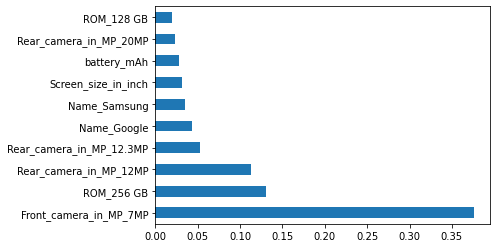

In [93]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(extratreesmodel.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [94]:
regressor=RandomForestRegressor()

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [97]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [98]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [99]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [100]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   49.5s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [102]:
rf_random.best_score_

-44.0680845751474

In [103]:
predictions=rf_random.predict(X_test)

In [104]:
predictions

array([20.17866667, 12.4184    , 10.        , 13.39098333, 10.        ,
        8.92494167, 52.47132381, 10.        , 11.20976667, 16.92385801,
       59.76192857, 10.        ,  9.38814881, 75.62795714,  9.99052995,
        9.34328095, 15.53465   , 57.11223333,  7.057     ,  8.1700131 ,
        9.0002    ,  9.02674921, 41.3262    , 10.        ,  8.01788333,
       11.40266667, 15.32508333, 33.89232857, 22.87423571, 10.67135714,
       22.87423571, 28.79058333,  7.71264781, 10.        , 50.90750357,
        7.49772143,  9.0002    , 13.51395595, 15.181     , 10.        ,
       10.        , 10.        , 13.51395595, 23.84706667,  8.1700131 ,
       18.42805714, 13.39098333, 13.52809286, 12.54403853, 52.47132381,
        9.9220381 , 18.26933333, 15.5938986 , 19.38053571, 15.64666429,
       10.        , 47.02550238,  9.34137381, 11.07895714, 20.82840714,
        8.70468095, 14.73563333, 25.0945    ,  9.91391667, 14.0966    ,
        9.20533929, 21.1465504 , 52.47132381, 15.12752143, 28.21

/home/anshul/anaconda3/envs/mobileprediction/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

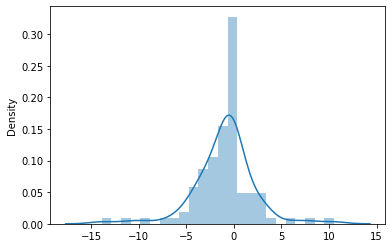

In [105]:
sns.distplot(y_test-predictions)

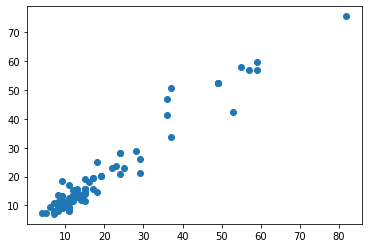

In [106]:
plt.scatter(y_test,predictions)

In [107]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.1427828751987037
MSE: 11.051708278232583
RMSE: 3.324410967108697


In [108]:
import pickle
# open a file, where you ant to store the data
file = open('mobile_price_prediction_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [109]:
model = open('mobile_price_prediction_model.pkl','rb')
forest = pickle.load(model)

y_prediction = forest.predict(X_test)

metrics.r2_score(y_test, y_prediction)

0.9461594058219087